## Data Robot Eurovision Analysis

*My Question* Is there a political bias with Eurovision voting?

*What is it?* Eurovision is an international (mostly European) song contest that has been happening since 1956 (more information: https://en.wikipedia.org/wiki/Eurovision_Song_Contest)

*How will this be analyzed?* This analysis will go through the open dataset https://eurovision.tv/history/full-split-results which provides all of the points given by country and how they were awarded.  I will first clean the data and then organize it into two sets, one of which will be how many points a country gave to it's neighboring countries and one set with all the other points.


In [1]:
# Importing 
import pandas as pd
import numpy as np
import scipy.stats as stats

# For my stylish plots
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import data into df
gf_2017 = pd.read_excel('ESC2017_GF_Results.xlsx',sheetname='FinalResults')
# Verify data is there
gf_2017.head()

,Rank,DDI,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,CzechRepublic,Georgia,Montenegro,Azerbaijan,SanMarino,Italy,Australia
0,1,11,Portugal,758,14,20,17,20,17,15,...,19,13,22,20,20,8,16,19,10,14
1,2,25,Bulgaria,615,20,17,24,18,18,17,...,22,18,7,14,13,8,14,14,10,13
2,3,7,Moldova,374,0,3,10,7,4,6,...,10,0,14,8,0,3,20,8,20,22
3,4,23,Belgium,363,5,10,6,0,5,5,...,8,2,5,4,0,10,4,13,9,4
4,5,24,Sweden,344,2,5,11,14,6,11,...,4,11,9,7,9,7,3,2,10,12


In [3]:
# Dropping first couple cols (because who needs Rank, indentifier and total)
# Also, renaming index to Countries because it's a lot easier and makes more sense this way
points_df = gf_2017.copy()
points_df.index = points_df['Country']
del points_df['Rank']
del points_df['DDI']
del points_df['Country']
del points_df['Total']

In [4]:
# Using simple measure for now to determine bias: there is political bias when countries vote for neighboring countries 
# more than others
# TODO: key improvement here is to dig into the political relationaships and get a better 'neighbor' definition.
# Currently this leaves out countries like Australia and Israel

# Building dict of neighboring countries 
neighbors_dict = {
    u'Portugal':['Spain'],
    u'Bulgaria':['Romania','Greece','Macedonia','Serbia'], 
    u'Moldova':['Romania','Ukraine'], 
    u'Belgium':['Netherlands','France','Germany'], 
    u'Sweden':['Norway','Denmark','Finland'],
    u'Italy':['Croatia','Austria','SanMarino','Switzerland','Slovenia','Malta'], 
    u'Romania':['Moldova','Bulgaria','Hungary','Ukraine','Serbia'], 
    u'Hungary':['Ukraine','Romania','Austria','Croatia'], 
    u'Australia':[], 
    u'Norway':['Sweden','Denmark','Finland'],
    u'Netherlands':['Belgium','Germany'], 
    u'France':['Spain','Belgium','Switzerland'], 
    u'Croatia':['Hungary','Italy','Slovenia','Montenegro'], 
    u'Azerbaijan':['Armenia','Georgia'],
    u'UnitedKingdom':[], 
    u'Austria':['Italy','Germany','Hungary','Slovenia','CzechRepublic'], 
    u'Belarus':['Ukraine','Poland','Latvia','Lithuania'], 
    u'Armenia':['Azerbaijan','Georgia'], 
    u'Greece':['Cyprus','Bulgaria','Macedonia','Albania'],
    u'Denmark':['Sweeden','Norway','Finland'], 
    u'Cyprus':['Greece'], 
    u'Poland':['Germany','Ukraine','Belarus','Lithuania','CzechRepublic'], 
    u'Israel':[], 
    u'Ukraine':['Belarus','Moldova','Hungary','Poland'], 
    u'Germany':['Netherlands','Poland','Austria','Belgium','France','Switzerland','CzechRepublic'],
    u'Spain':['Portugal','France']    
}

In [5]:
# Creates neighbor_df which is a sparse binary df identifying neighbors (will be data mask moving forward)
neighbor_df = pd.DataFrame(columns=points_df.columns, index=points_df.index)
neighbor_df = neighbor_df.fillna(0)

for country in neighbors_dict.keys():
    for neighbor in neighbors_dict[country]:
        neighbor_df[country][neighbor] = 1

In [6]:
# Creates compare_df wihch has average points given to neighboring countries and non neighboring countries by country
# Note: lots of NaNs here because only the countries in the final round of scoring (24 of them) where used
compare_df = pd.DataFrame(index=points_df.columns,columns=['Neighbors Avg','Non Neighbors Avg'])
compare_df['Neighbors Avg'] = points_df[neighbor_df==1].mean()
compare_df['Non Neighbors Avg'] = points_df[neighbor_df!=1].mean()

compare_df.head()

,Neighbors Avg,Non Neighbors Avg
Albania,NaN,4.461538
Austria,7.333333,4.086957
Belarus,1.500000,4.708333
Belgium,4.666667,4.434783
Croatia,15.500000,3.541667


In [12]:
# Export data
compare_df.to_csv('comparison_df.csv')

In [7]:
# A looks at our data
compare_df.dropna()

,Neighbors Avg,Non Neighbors Avg
Austria,7.333333,4.086957
Belarus,1.500000,4.708333
Belgium,4.666667,4.434783
Croatia,15.500000,3.541667
Cyprus,24.000000,3.680000
France,4.000000,4.500000
Germany,4.400000,4.476190
Greece,18.000000,3.333333
Netherlands,6.000000,4.333333
Norway,9.500000,4.041667


In [8]:
# Some basic stats on our data
compare_df.describe()

,Neighbors Avg,Non Neighbors Avg
count,22.000000,42.000000
mean,7.915909,4.290457
std,6.231344,0.418795
min,0.000000,3.090909
25%,3.625000,4.343750
50%,5.750000,4.461538
75%,12.000000,4.461538
max,24.000000,4.782609


In [9]:
# Creating a neighbor multiple.  This shows how much more a country voted for it's neighbors opposed to others
# Also, saved it to csv for use in tableau viz
neighbor_mult = (compare_df['Neighbors Avg']/compare_df['Non Neighbors Avg'])
neighbor_mult.to_csv('neighbor_mult.csv')

neighbor_mult.dropna()

Austria        1.794326
Belarus        0.318584
Belgium        1.052288
Croatia        4.376471
Cyprus         6.521739
France         0.888889
Germany        0.982979
Greece         5.400000
Netherlands    1.384615
Norway         2.350515
Poland         0.418182
Portugal       1.126126
Romania        3.882353
Spain          3.640449
Sweden         1.257143
Ukraine        3.882353
Bulgaria       2.808511
Hungary        0.576190
Moldova        3.130435
Armenia        0.000000
Azerbaijan     0.000000
Italy          0.770642
dtype: float64

### Viz of the data

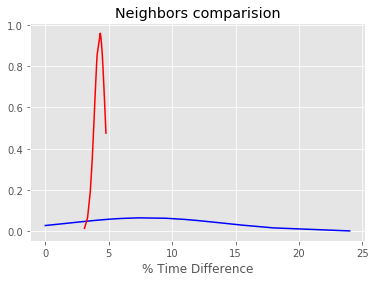

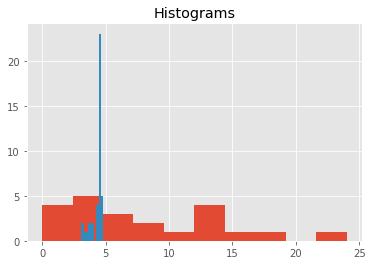

In [10]:
plt.figure()

h = compare_df['Neighbors Avg']
h = h.sort_values()
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit, color='blue')

h = compare_df['Non Neighbors Avg']
h = h.sort_values()
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

plt.plot(h,fit, color='red')
plt.title('Neighbors comparision')
plt.xlabel("% Time Difference")

plt.figure()
compare_df['Neighbors Avg'].hist()
compare_df['Non Neighbors Avg'].hist()
plt.title('Histograms')

### T-Test Time

In [11]:
# Method now is using Student T-Test to determine if there is a significant difference between the countries voting 
# for their neighbors and the conutries when they voted for other non-neighbors

# Null hypothesis: That there is no difference between these sets

a = compare_df['Neighbors Avg']
b = compare_df['Non Neighbors Avg']

stat, pval = stats.ttest_rel(a,b,nan_policy='omit')
print 'pval: %0.2f tstat: %2.2f' % (pval, stat)

pval: 0.01 tstat: 2.65


A p values of less than 0.05 here indicates that we can reject the null hypothesis that says they are the same and conclude that they are in fact statistically and significantly diffent.  Which leads us back to the original question, is there political bias?  And the answer would be yes

### Conclusion/ Areas to Improve

*Conclusion:* From this analysis we can conclude that **there is a bias** when it comes to Eurovision countries and their voting patterns

*Areas to improve:* There are some definite areas to improve this analysis given some more time  
- More data.  This would confirm the trend (over multiple years) as well as analyze the countries that weren't accounted for in this data set
- Better test metric.  Right now it's simply neighbors but there are some relationships that are not represented with this.  For example, Armenia and Azerbaijan extremely dislike each other and is skewing this analysis because they are neighbors